# k-Nearest-Neighbors



In [1]:
from matplotlib.colors import ListedColormap

from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp


#from src.knn_ploting import plot_distances

%matplotlib inline
# Make it pretty
#plt.style.use('ggplot')

## kNN (k Nearest Neighbors)

Over the next weeks we'll talk about a number of machine learning models. The kNN model is a supervised-learning model used for classification or regression. It is not the most practical, but it's a great example to get us started.

**Discussion:** What do all those words mean?

Ok, let's start by building a classification model. First, we need some data for this model...

In [2]:
# Creating data for this demo
np.random.seed(7)  #7

horse_weight = np.random.rand(100) * 1500.0 + 400.0  + 50      # lbs
horse_height = horse_weight/370 + np.random.normal(0, 0.5, horse_weight.shape) + 2.5  # ft

dog_weight = np.random.rand(40) * 500.0 + 10.0      # lbs
dog_height = dog_weight/300 + np.random.normal(0, 0.3, dog_weight.shape) + 0.5  # ft

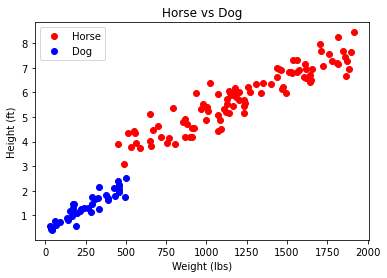

In [21]:
#Plotting data created
plt.plot(horse_weight, horse_height, 'ro', label='Horse')
plt.plot(dog_weight, dog_height, 'bo', label='Dog')
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)")
plt.legend()
plt.show()

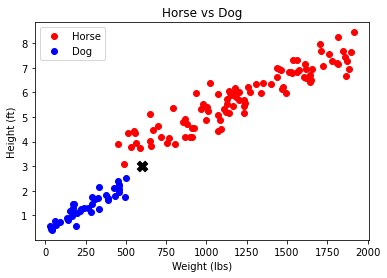

In [22]:
plt.plot(horse_weight, horse_height, 'ro', label='Horse')
plt.plot(dog_weight, dog_height, 'bo', label='Dog')
plt.scatter(600, 3, marker='X', c='black', s=110)
plt.title("Horse vs Dog")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (ft)")
plt.legend()
plt.show()

Is anyone concerned about the 500 pound dogs we are seeing?

Finally, lets put this data into a dataframe.  

In [23]:
df = pd.DataFrame( data = [np.append(horse_weight,dog_weight),
                           np.append(horse_height,dog_height),
                           np.append(np.ones(len(horse_height)),
                                     np.zeros(len(dog_height)))],
                  index=['weight','height','dog_horse']
                 )
animal = df.T
animal.head()

,weight,height,dog_horse
0,564.462434,3.927560,1.0
1,1619.878188,6.582664,1.0
2,1107.613847,5.343695,1.0
3,1535.197767,7.297626,1.0
4,1916.984268,8.445828,1.0


## Building a model with sklearn 

First we will need to import what we need from the library sklearn

In [24]:
from sklearn import neighbors

Then we will need to **instantiate our model**. This includes selecting our hyperparameter, k. 

In [25]:
k = 5
clf = neighbors.KNeighborsClassifier(k)

Next, we will need to use the model we selected and fit this model to the training data I have.  `fit` will take to parameters as input -- your features and targets.  

Let's create the features and targets:

In [26]:
features = animal[['weight','height']]
target = animal['dog_horse']

Finally, let's fit the model.

In [27]:
clf.fit(features, target)

KNeighborsClassifier()

Now we can use `clf` to make predictions on unseen data! Let's say we have an animal that has the following features:

weight = 100 <br>
height = 2   <br>

Is it a dog or horse?

We can use the predict method to make this decision now that we have fit our model.

In [28]:
test_data = pd.DataFrame([[100,2]])

In [29]:
clf.predict(test_data)

array([0.])

Recall, 0 is a dog! Let's try another few :

weight=1000, height=5 <br>
weight=500, height = 3

In [30]:
test_data = pd.DataFrame([[1000,5],[500,3]])

In [31]:
clf.predict(test_data)

array([1., 1.])

## Activity 

Use the features and targets created below for the iris dataset below to do the following:
- Plot the features on a scatter plot and color the points according to the species
- Build a kNN classifier to predict whether a flower is of the species setosa or versicolor
- Predict whether an iris with sepal_length = 5.7 and petal_length = 3.0

In [32]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [33]:
# drop one species for simplicity
iris = iris[iris['species'] != 'virginica']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


And let's add a column where we convert species into 0s and 1s.  We can do this easily with the get_dummies function!

In [35]:
iris = pd.get_dummies(iris)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


Note, we will only need one of the columns added, but we will keep them both for now...

#### Plot the features on a scatter plot and color the points according to the species

Ok, you have everything you need to make a plot.  Google 'pandas scatter' for a quick way to make this plot. 

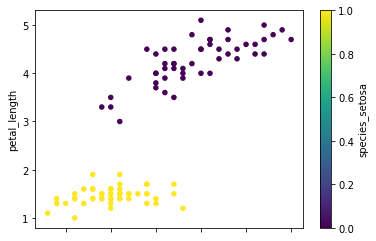

In [48]:
iris.plot.scatter(x='sepal_length',
                  y='petal_length',
                  c='species_setosa',
                  colormap='viridis');

#### Build a kNN classifier to predict whether a flower is of the species setosa or versicolor

Next, build a model, based on the features and targets below:

In [60]:
features = iris[['sepal_length', 'petal_length']]

In [61]:
target = iris['species_setosa']

In [62]:
k = 5

In [63]:
clf = neighbors.KNeighborsClassifier(k)

In [64]:
clf.fit(features,target)

KNeighborsClassifier()

Finally, make a prediction for the data point sepal_length = 5.7 and petal_length = 3.0

In [65]:
tester = pd.DataFrame([[5.7,3.0]])

In [66]:
clf.predict(tester)

array([0], dtype=uint8)